The `sklearn` function `Kmeans()` performs K-means clustering in Python. We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

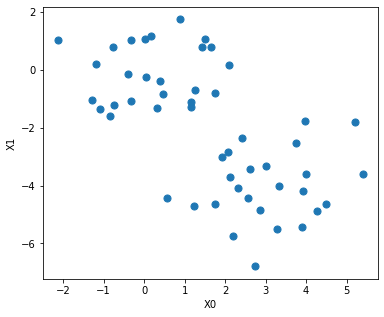

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')
plt.show()

We now perform K-means clustering with `K = 2`:

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 123).fit(X)

The cluster assignments of the 50 observations are contained in
`kmeans.labels_`:

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


The K-means clustering perfectly separated the observations into two clusters
even though we did not supply any group information to `Kmeans()`. We
can plot the data, with each observation colored according to its cluster
assignment:

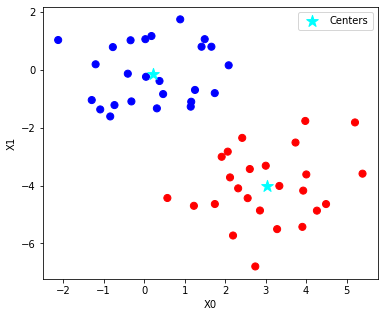

In [4]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr) 
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'cyan', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Here the observations can be easily plotted because they are two-dimensional.
If there were more than two variables then we could instead perform PCA
and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because
we generated the data. However, for real data, in general we do not know
the true number of clusters. We could instead have performed K-means
clustering on this example with `K  =  3`. If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:

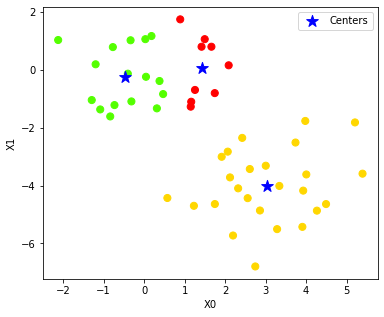

In [5]:
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

To run the `Kmeans()` function in python with multiple initial cluster assignments,
we use the `n_init` argument (default: 10). If a value of `n_init` greater than one
is used, then K-means clustering will be performed using multiple random
assignments, and the `Kmeans()` function will
report only the best results. Here we compare using `n_init = 1`:

In [6]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123).fit(X)
km_out_single_run.inertia_

104.52330756352504

to `n_init = 20`:

In [7]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 20, random_state = 123).fit(X)
km_out_single_run.inertia_

98.83395271281779

In [8]:
km_out_single_run = KMeans(n_clusters = 2, n_init = 20, random_state = 123).fit(X)
km_out_single_run.inertia_

125.8630566030779

Note that `.inertia_` is the total within-cluster sum of squares,
which we seek to minimize by performing K-means clustering.

It is generally recommended to always run K-means clustering with a large
value of `n_init`, such as 20 or 50 to avoid getting stuck in an undesirable local
optimum.

When performing K-means clustering, in addition to using multiple initial
cluster assignments, it is also important to set a random seed using the
`random_state` parameter. This way, the initial cluster assignments can
be replicated, and the K-means output will be fully reproducible.

Reference: https://jcrouser.github.io/